# Problem statement.

#####   Build a recommender system by using cosine simillarties score.

## 1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
book = pd.read_csv("book.csv",encoding='latin-1',error_bad_lines=False,sep=',')

<ipython-input-2-8ceeabf3108c>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book = pd.read_csv("book.csv",encoding='latin-1',error_bad_lines=False,sep=',')


In [3]:
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


## EDA

In [4]:
book.shape

(10000, 4)

In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [6]:
book.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [7]:
book.isnull().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

## There is no null value

In [8]:
book[('Book.Title')].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Book.Title, Length: 9659, dtype: int64

In [9]:
book['Book.Title'].unique

<bound method Series.unique of 0                                     Classical Mythology
1                                            Clara Callan
2                                    Decision in Normandy
3       Flu: The Story of the Great Influenza Pandemic...
4                                  The Mummies of Urumchi
                              ...                        
9995         American Fried: Adventures of a Happy Eater.
9996                                Cannibal In Manhattan
9997                      How to Flirt: A Practical Guide
9998                                             Twilight
9999                         Kids Say the Darndest Things
Name: Book.Title, Length: 10000, dtype: object>

In [10]:
book.rename(columns={'User.ID':'ID','Book.Title':"bookTitle",'Book.Rating':'Rating'},inplace=True)

In [11]:
len(book.ID.unique())

2182

## >>> there are 2182 unique ID 

In [12]:
(book.bookTitle.value_counts())

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: bookTitle, Length: 9659, dtype: int64

In [13]:
len(book.bookTitle.unique())

9659

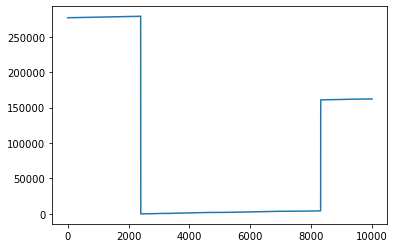

In [14]:
plt.plot('ID',data=book)

## Visualization

In [15]:
top_rating  = book[book['Rating']==10]

In [16]:
top_rating

,Unnamed: 0,ID,bookTitle,Rating
6,7,276745,What If?: The World's Foremost Military Histor...,10
16,17,276760,More Cunning Than Man: A Social History of Rat...,10
23,24,276772,Mary-Kate &amp; Ashley Switching Goals (Mary-K...,10
24,25,276772,Tell Me This Isn't Happening,10
34,35,276788,Sturmzeit. Roman.,10
...,...,...,...,...
9958,9959,162052,HOUSE OF MIRTH,10
9967,9968,162052,The Man Who Ate the 747,10
9968,9969,162052,Women of Mystery,10
9969,9970,162054,The Maggody Militia: An Arly Hanks Mystery (Ar...,10


In [17]:
average_rating = book['Rating'].mean()
average_rating

7.5663

## Average Rating is 7.5 by the user 

In [18]:
rating_count=book['Rating'].value_counts()
rating_count

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Rating, dtype: int64

<AxesSubplot:>

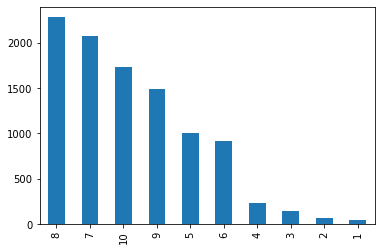

In [19]:
rating_count.plot(kind='bar')

In [20]:
rating_count.sort_values()

1       43
2       63
3      146
4      237
6      920
5     1007
9     1493
10    1732
7     2076
8     2283
Name: Rating, dtype: int64

## BY seeing this visualization it seems that most of the rating are around (8 to 10) and also less pepole are giving rating less than 4

In [21]:
book.columns

Index(['Unnamed: 0', 'ID', 'bookTitle', 'Rating'], dtype='object')

In [22]:
ID_count=book['ID'].value_counts(ascending=True)

ID_count

276726      1
2340        1
2339        1
2336        1
2335        1
         ... 
277427    150
4017      156
2276      212
162052    214
3757      523
Name: ID, Length: 2182, dtype: int64

<AxesSubplot:>

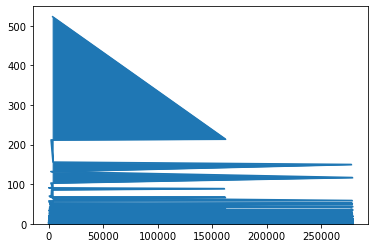

In [23]:
ID_count.plot(kind='area')


In [24]:
book.groupby('bookTitle')['Rating'].count()

bookTitle
 Jason, Madison &amp                                                       1
 Other Stories;Merril;1985;McClelland &amp                                 1
 Repairing PC Drives &amp                                                  1
'48                                                                        1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      1
                                                                          ..
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    1
\Well, there's your problem\: Cartoons                                     1
iI Paradiso Degli Orchi                                                    1
stardust                                                                   1
Ã?Â?bermorgen.                                                             1
Name: Rating, Length: 9659, dtype: int64

In [25]:
book['bookTitle']=book['bookTitle'].apply(lambda x:x.replace(':',',')if ':' in x else x)
book['bookTitle']= book['bookTitle'].apply(lambda x:x.replace(';',' ')if ';' in x else x)

In [26]:
book

,Unnamed: 0,ID,bookTitle,Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,"Flu, The Story of the Great Influenza Pandemic...",8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,"American Fried, Adventures of a Happy Eater.",7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,"How to Flirt, A Practical Guide",7
9998,9999,162121,Twilight,8


In [27]:
user_book_df = book.pivot_table(index='ID',columns='bookTitle',values='Rating').reset_index(drop=True).fillna(0)

In [28]:
user_book_df

bookTitle,"Jason, Madison &amp",Other Stories Merril 1985 McClelland &amp,Repairing PC Drives &amp,'48,"'O Au No Keia, Voices from Hawai'I's Mahu and Transgender Communities","...AND THE HORSE HE RODE IN ON , THE PEOPLE V. KENNETH STARR","01-01-00, A Novel of the Millennium","1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,"\I Won't Learn from You\, And Other Thoughts on Creative Maladjustment","\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\, Adventures of a Curious Character","\Well, there's your problem\, Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Using Cosine by KNN 

In [29]:
from scipy.sparse import csr_matrix

book_features_df_matrix = csr_matrix(user_book_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

model_knn.fit(book_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [30]:
user_book_df.shape

(2182, 9659)

In [31]:
query_index = np.random.choice(user_book_df.shape[0])
print(query_index)
distances,indices  = model_knn.kneighbors(user_book_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

1569


In [32]:
user_book_df

bookTitle,"Jason, Madison &amp",Other Stories Merril 1985 McClelland &amp,Repairing PC Drives &amp,'48,"'O Au No Keia, Voices from Hawai'I's Mahu and Transgender Communities","...AND THE HORSE HE RODE IN ON , THE PEOPLE V. KENNETH STARR","01-01-00, A Novel of the Millennium","1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,"\I Won't Learn from You\, And Other Thoughts on Creative Maladjustment","\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\, Adventures of a Curious Character","\Well, there's your problem\, Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_book_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_book_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 1569:

1: 1786, with distance of 0.7670666773506999:
2: 467, with distance of 0.8966107933964287:
3: 1456, with distance of 1.0:
4: 1453, with distance of 1.0:
5: 1458, with distance of 1.0:


In [34]:
csr_matrix((3, 4), dtype=np.int8).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)